In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import torch
import pickle

%load_ext autoreload
%autoreload 2
import metrics

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Ostrzeżenie: Biblioteka fvcore nie jest zainstalowana. Nie będzie można obliczyć FLOPS.
Aby ją zainstalować, uruchom: pip install fvcore


In [3]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

In [4]:
test_dataset = datasets.FashionMNIST(
    root='./data_mnist_test',
    train=False,
    download=True
)

In [5]:
device = ('cuda' if torch.cuda.is_available() else 'cpu')
device = 'cpu'

In [6]:
print(device)

cpu


In [7]:
def list_to_dictionary(data):
    keys_ = data[0].keys()
    length_ = len(data)

    temp_ = {}
    for key_ in keys_:
        temp_[key_] = []
        for i in range(length_):
            temp_[key_].append(data[i][key_])

    return temp_

## CNN

In [8]:
from CNN.cnn import CNN_

In [9]:
model_cnn = CNN_().to(device)
model_cnn.load_state_dict(torch.load("./CNN/weights/CNN_2025-06-17_18:37:22.pth", weights_only=True))
model_cnn.eval()

transform_cnn = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

In [10]:
path = "CNN/results/CNN_2025-06-17_18:37:22/history.pickle"
with open(path, 'rb') as f:
    data_cnn = pickle.load(f)
data_cnn['val_acc'] = [x*100 for x in data_cnn['val_acc']]
data_cnn['train_acc'] = [x*100 for x in data_cnn['train_acc']]

## CNN LSTM

In [11]:
from LSTM.lstm import cnn_lstm_

In [12]:
model_lstm = cnn_lstm_().to(device)
model_lstm.load_state_dict(torch.load("LSTM/weights/CNN_lstm_2025-06-17_18:45:11.pth", weights_only=True))
model_lstm.eval()

transform_lstm = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

In [13]:
path = "LSTM/results/CNN_lstm_2025-06-17_18:45:11/history.pickle"
with open(path, 'rb') as f:
    data_lstm = pickle.load(f)
data_lstm['val_acc'] = [x*100 for x in data_lstm['val_acc']]
data_lstm['train_acc'] = [x*100 for x in data_lstm['train_acc']]

## ResNet + attention

In [14]:
from ResNet.model.residual_attention_network import ResidualAttentionModel_92_32input_update as ResidualAttentionModel

model_res = ResidualAttentionModel().to(device)
model_res.load_state_dict(torch.load('./ResNet/weights/ResidualAttentionModel_92_32input_update_2025-06-16_23:37:33.pth', weights_only=True))
model_res.eval()

transform_resnet = transforms.Compose([
    transforms.Pad(padding=2),
    transforms.Grayscale(num_output_channels=3),
    transforms.ToTensor(),
])

In [15]:
path = "./ResNet/results/ResidualAttentionModel_92_32input_update_2025-06-16_23:37:33/history.pickle"
with open(path, 'rb') as f:
    data_res = pickle.load(f)

In [16]:
data_res = list_to_dictionary(data_res)

## VGG + attention

In [17]:
from VGG.networks import AttnVGG

In [18]:
model_vgg = AttnVGG(num_classes=10).to(device)
model_vgg.load_state_dict(torch.load("./VGG/weights/VGG_attention2025-06-17_13:42:24.pth", weights_only=True))
model_vgg.eval()

transform_vgg = transforms.Compose([
    transforms.Grayscale(num_output_channels=3),
    transforms.Resize((224,224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.ToTensor(),
])

In [19]:
path = "./VGG/results/VGG_attention2025-06-17_13:42:24/history.pickle"
with open(path, 'rb') as f:
    data_vgg = pickle.load(f)

In [20]:
data_vgg = list_to_dictionary(data_vgg)

## Vision Transformer

In [21]:
from VisionTransformer.simple_vit import SimpleViT

In [22]:
model_sm_vt = SimpleViT(image_size=224, patch_size=16, num_classes=10, dim=128, depth=6, heads=16, mlp_dim=2048).to(device)
model_sm_vt.load_state_dict(torch.load("./VisionTransformer/weights/VT_simple_2025-06-17_18:07:55.pth", weights_only=True))
model_sm_vt.eval()

transform_sm_vt = transforms.Compose([
    transforms.Grayscale(num_output_channels=3),
    transforms.Resize((224,224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.ToTensor(),
])

In [23]:
path = "./VisionTransformer/results/VT_simple_2025-06-17_18:07:55/history.pickle"
with open(path, 'rb') as f:
    data_sm_vt = pickle.load(f)

In [24]:
data_sm_vt = list_to_dictionary(data_sm_vt)

## Porównanie

In [25]:
data_num = 100

x = [test_dataset[i][0] for i in range(data_num)]
y = [test_dataset[i][1] for i in range(data_num)]

In [26]:
print(data_cnn.keys())
print(data_res.keys())

dict_keys(['loss', 'val_loss', 'train_acc', 'val_acc'])
dict_keys(['loss', 'val_loss', 'train_acc', 'val_acc', 'epoch_time'])


In [27]:
compare_dict = {
    'CNN': {'model': model_cnn, 'transform': transform_cnn, 'history': data_cnn},
    'LSTM': {'model': model_lstm, 'transform': transform_lstm, 'history': data_lstm},
    'ResNet': {'model': model_res, 'transform': transform_resnet, 'history': data_res},
    'VGG': {'model': model_vgg, 'transform': transform_vgg, 'history': data_vgg},
    'sm_vt': {'model': model_sm_vt, 'transform': transform_sm_vt, 'history': data_sm_vt},
}

In [28]:
# print(data_lstm['train_acc'])
# print(data_lstm['val_acc'])

Ostrzeżenie: Biblioteka fvcore nie jest zainstalowana. Nie będzie można obliczyć FLOPS.
Aby ją zainstalować, uruchom: pip install fvcore
--- Rozpoczynanie analizy modeli ---
Analizowanie: CNN...
Analizowanie: LSTM...
Analizowanie: ResNet...
Analizowanie: VGG...
Analizowanie: sm_vt...


TABELA PORÓWNAWCZA MODELI


,Accuracy,AUC (micro),F1-score (w),Precision (w),Recall (w),Czas predykcji (s),Przepustowość (próbki/s),Liczba parametrów,Rozmiar (MB),FLOPS,Przeuczenie (delta),MSE
Model,,,,,,,,,,,,
CNN,0.910000,0.994944,0.907749,0.916500,0.910000,0.006,"17,875","121,930",0.47,0,1.666667,0.650000
LSTM,0.890000,0.992756,0.887519,0.897167,0.890000,0.004,"22,326","52,746",0.20,0,0.641667,0.790000
ResNet,0.910000,0.997678,0.911891,0.928500,0.910000,1.089,92,"19,920,362",76.54,0,6.076667,1.090000
VGG,0.940000,0.998700,0.938590,0.944333,0.940000,7.139,14,"15,195,212",58.03,0,0.705000,0.850000
sm_vt,0.870000,0.993022,0.870271,0.889048,0.870000,2.154,46,"6,409,354",24.47,0,1.406667,0.980000


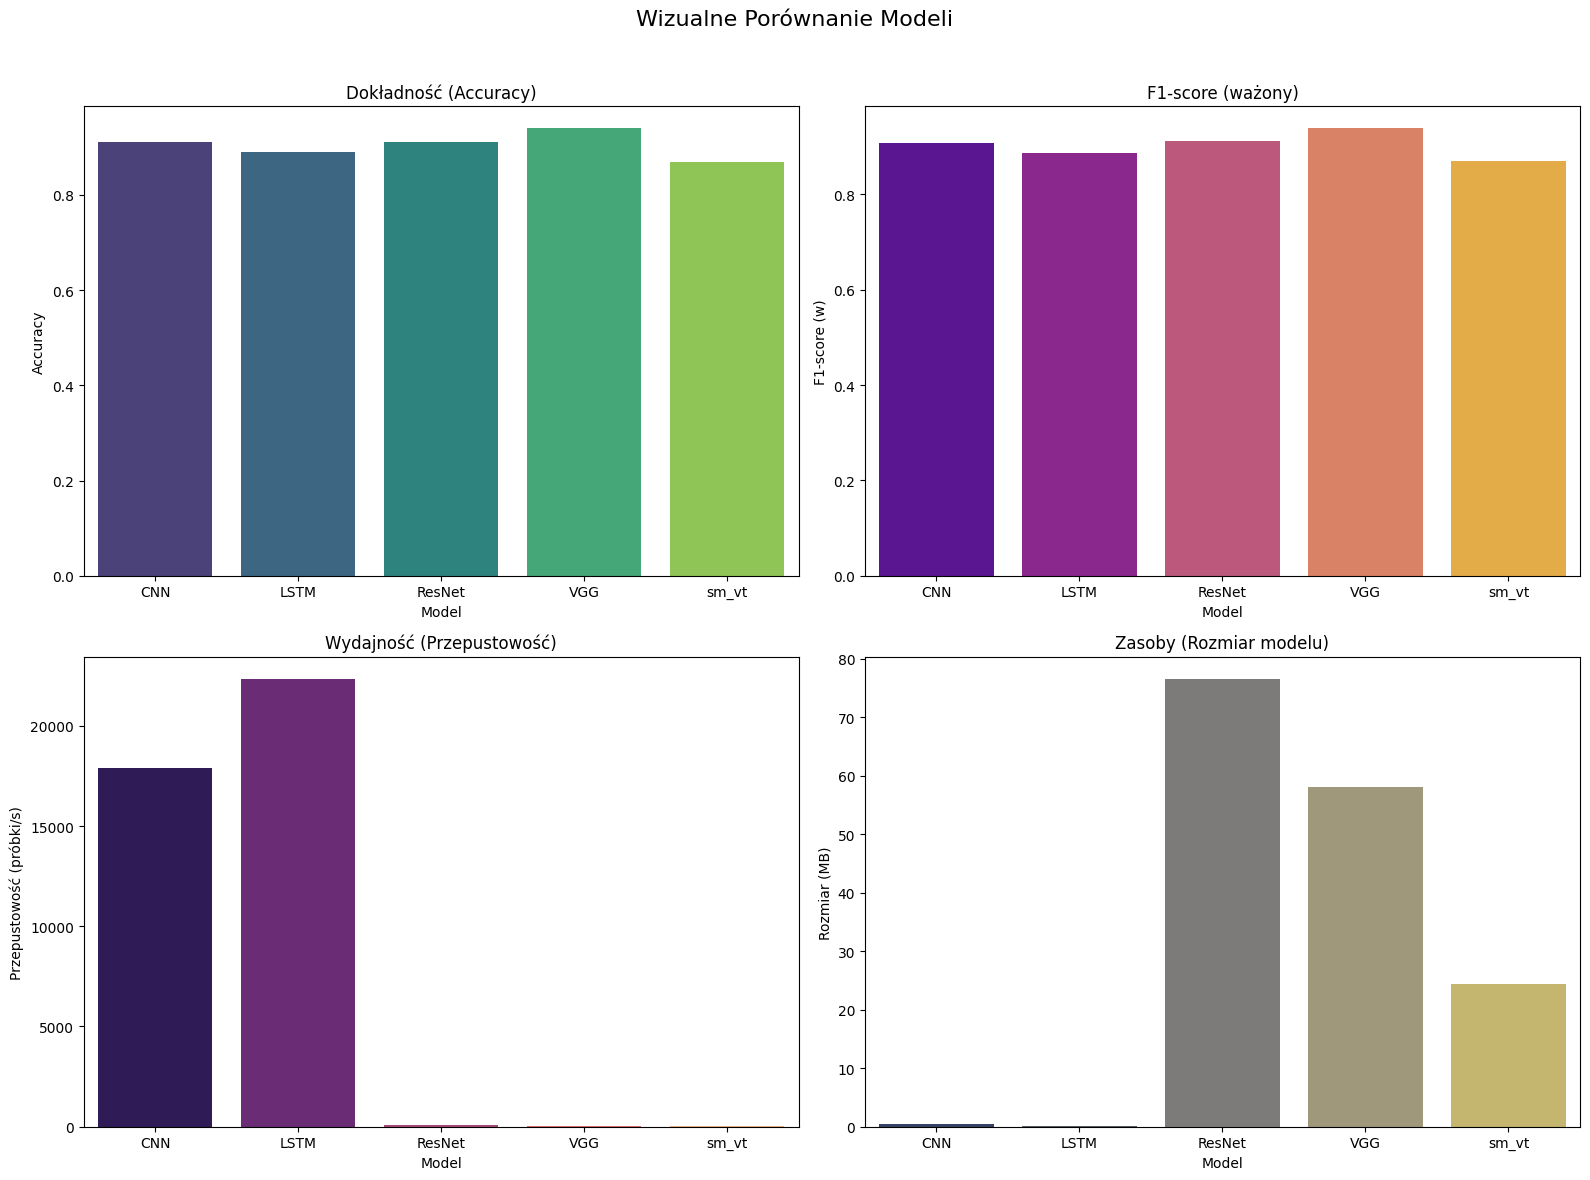



PORÓWNANIE KRZYWYCH UCZENIA


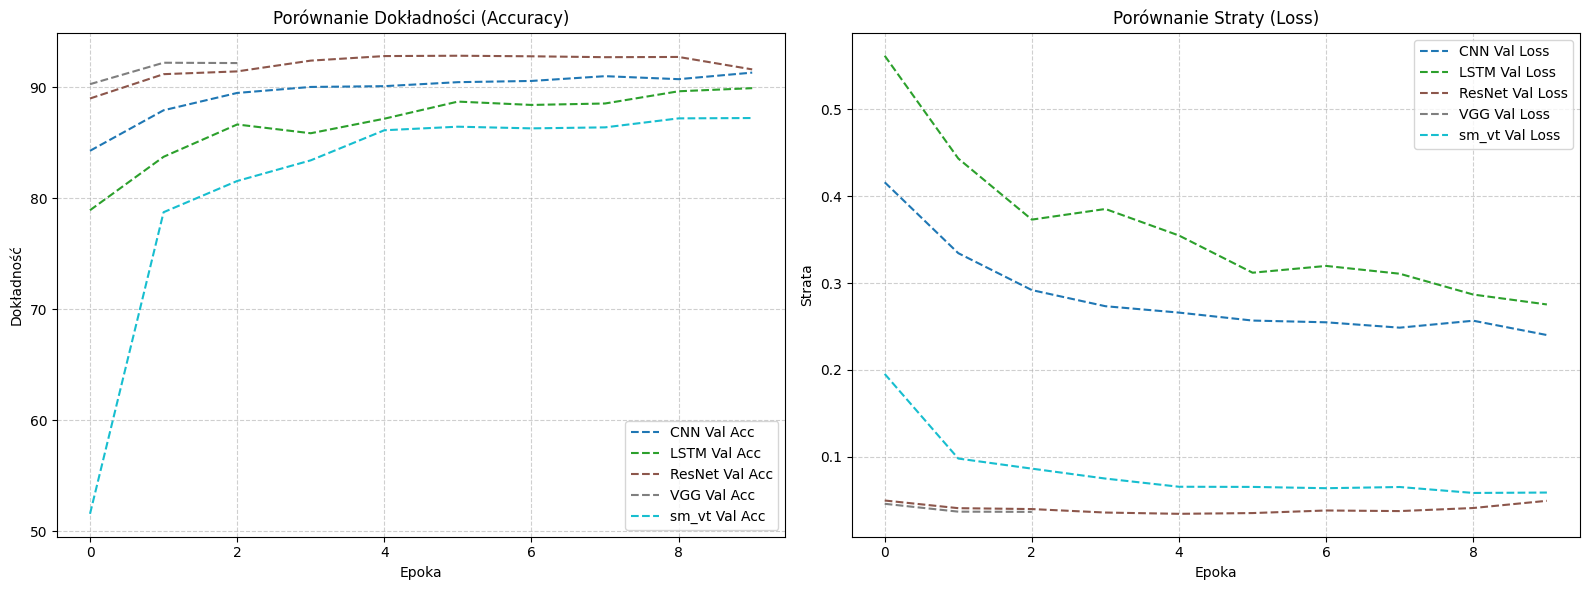



PORÓWNANIE KRZYWYCH ROC (Uśrednione)


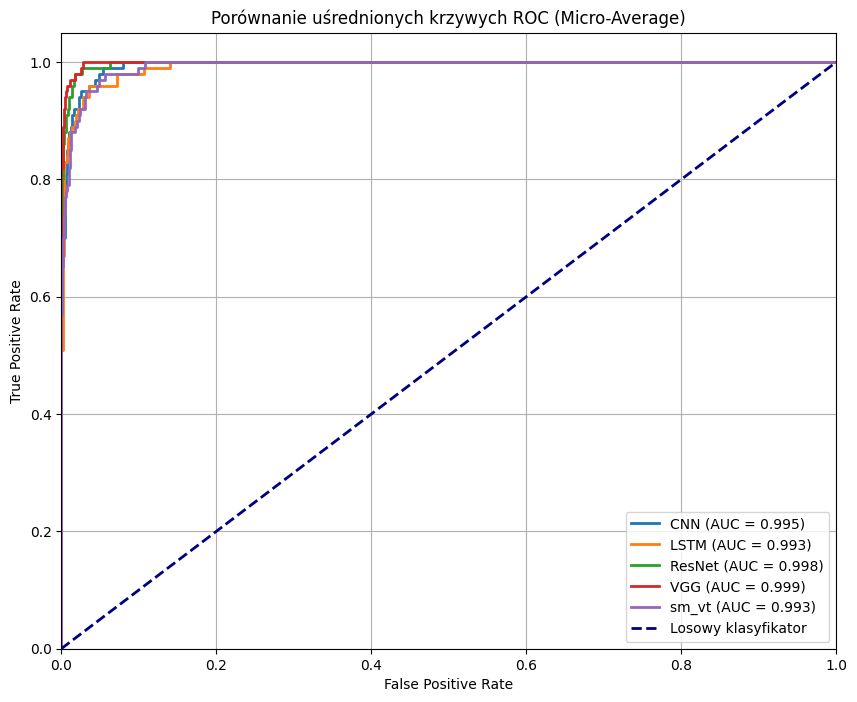



PORÓWNANIE MACIERZY BŁĘDÓW


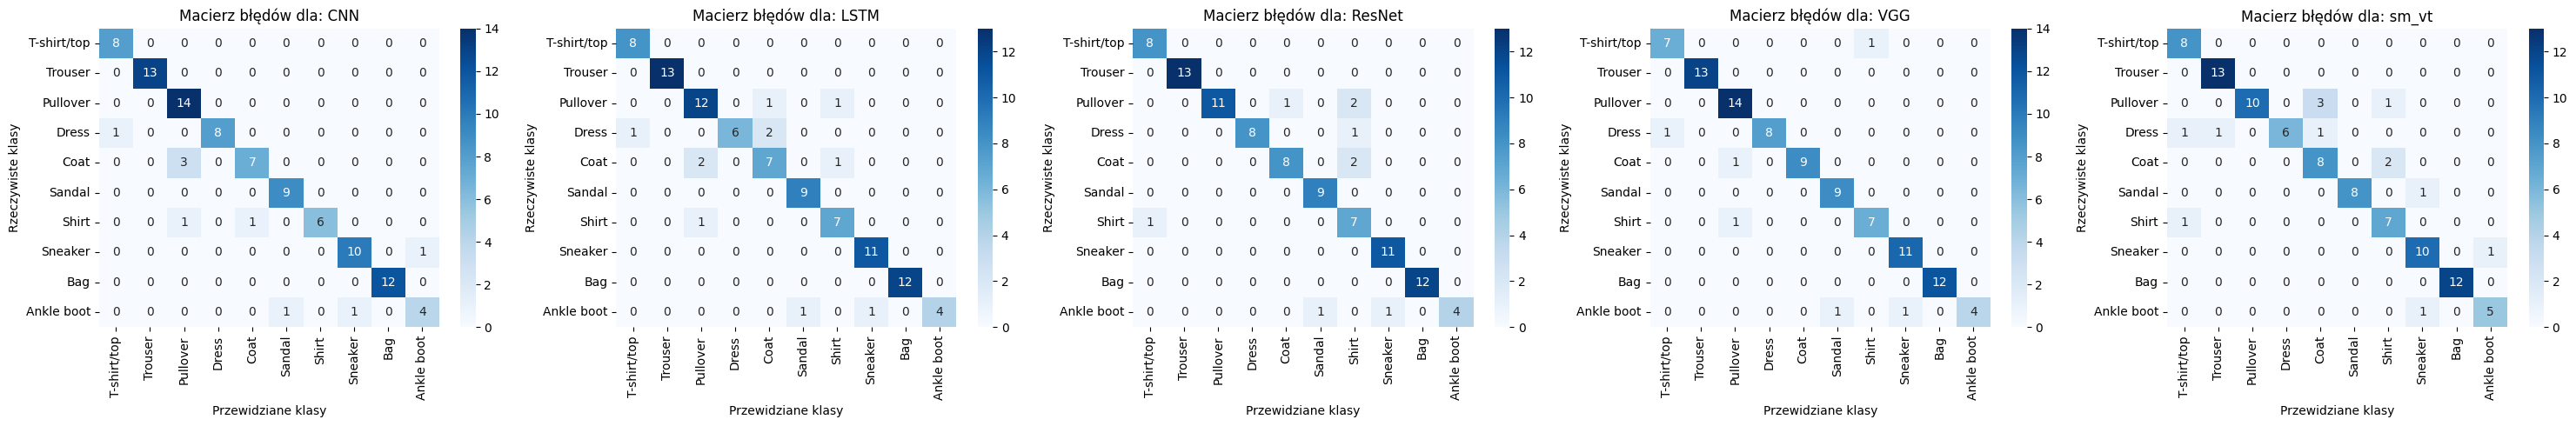

In [29]:
import importlib
import metrics
importlib.reload(metrics)
metrics.compare_models(compare_dict, x, y, device)